In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1 = '/file1.xlsx'
path2 = '/file2.xlsx'

In [ ]:
data1=pd.read_excel(path1)
data2=pd.read_excel(path2)

# PCA

In [ ]:
X1=data1[['feature 1','feature 2']]
X2=data2[['feature 1','feature 2']]
y1=data1['class']
y2=data2['class']

In [ ]:
def normalize(df):
  features=df.columns.tolist()
  for attr in features:
    df[attr]=(df[attr]-df[attr].mean())/(df[attr].var()**0.5)
  return df

In [ ]:
X1_norm=normalize(X1)
X2_norm=normalize(X2)

In [ ]:
X1_norm=np.array(X1_norm)
X2_norm=np.array(X2_norm)

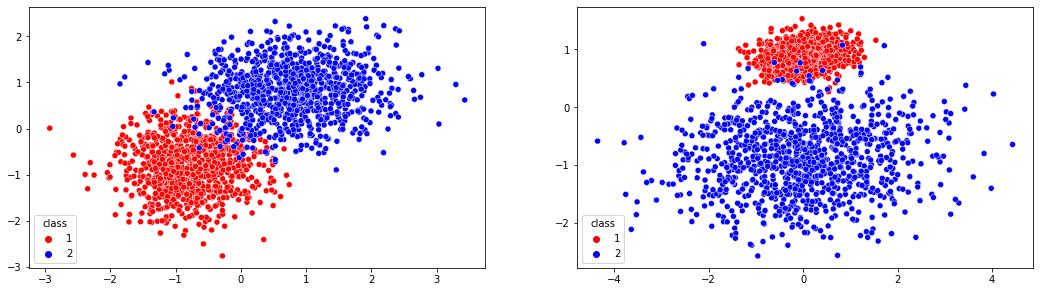

In [ ]:
plt.rcParams["figure.figsize"] =[18, 4.8]
plt.subplot(1, 2, 1)
sns.scatterplot(X1_norm[:,0],X1_norm[:,1],hue=y1,palette=['r','b'])
plt.subplot(1, 2, 2)
sns.scatterplot(X2_norm[:,0],X2_norm[:,1],hue=y2,palette=['r','b'])

In [ ]:
cov1=np.dot(X1_norm.T,X1_norm)*1/(len(X1_norm)-1)
cov2=np.dot(X2_norm.T,X2_norm)*1/(len(X2_norm)-1)

In [ ]:
u1,v1=np.linalg.eig(cov1)
u2,v2=np.linalg.eig(cov2)

In [ ]:
print(u1)
print(u2)

[1.65678499 0.34321501]
[1.048888 0.951112]


In [ ]:
ind1=0
if u1[1]>u1[0]:
  ind1=1
ind2=0
if u2[1]>u2[0]:
  ind2=1

In [ ]:
v1=v1[:,ind1]
v2=v2[:,ind2]

In [ ]:
X1_reduced=np.dot(v1,X1_norm.T)
X2_reduced=np.dot(v2,X2_norm.T)

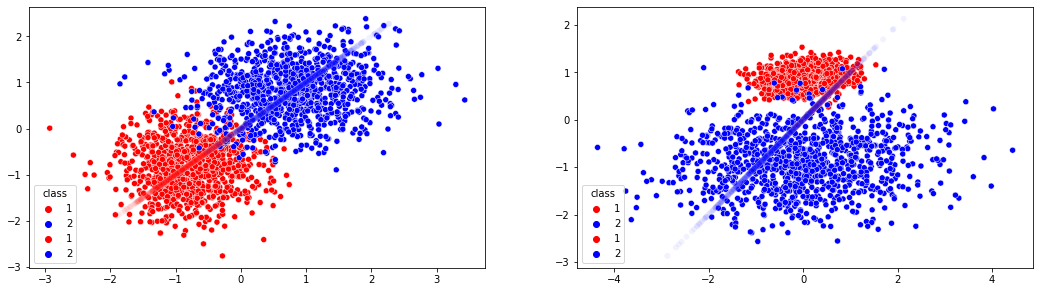

In [ ]:
plt.rcParams["figure.figsize"] =[18, 4.8]
plt.subplot(1, 2, 1)
sns.scatterplot(X1_norm[:,0],X1_norm[:,1],hue=y1,palette=['r','b'])
sns.scatterplot(X1_reduced*v1[0],X1_reduced*v1[1],hue=y1,palette=['r','b'],alpha=0.05)
plt.subplot(1, 2, 2)
sns.scatterplot(X2_norm[:,0],X2_norm[:,1],hue=y2,palette=['r','b'])
sns.scatterplot(X2_reduced*v2[0],X2_reduced*v2[1],hue=y2,palette=['r','b'],alpha=0.05)

# LDA

In [ ]:
data1[['feature 1','feature 2']]=normalize(data1[['feature 1','feature 2']])
data2[['feature 1','feature 2']]=normalize(data2[['feature 1','feature 2']])

In [ ]:
data11=data1[data1['class']==1]
data12=data1[data1['class']==2]
data21=data2[data2['class']==1]
data22=data2[data2['class']==2]

In [ ]:
X11_norm=data11[['feature 1','feature 2']]
X12_norm=data12[['feature 1','feature 2']]
X21_norm=data21[['feature 1','feature 2']]
X22_norm=data22[['feature 1','feature 2']]

In [ ]:
X11_norm=np.array(X11_norm)
X12_norm=np.array(X12_norm)
X21_norm=np.array(X21_norm)
X22_norm=np.array(X22_norm)

In [ ]:
cov11=np.dot(X11_norm.T,X11_norm)*1/(len(X11_norm))
cov12=np.dot(X12_norm.T,X12_norm)*1/(len(X12_norm))
cov21=np.dot(X21_norm.T,X21_norm)*1/(len(X21_norm))
cov22=np.dot(X22_norm.T,X22_norm)*1/(len(X22_norm))

In [ ]:
cov1=cov11+cov12
cov2=cov21+cov22

In [ ]:
M11=np.mean(X11_norm,axis=0).reshape(1,2)
M12=np.mean(X12_norm,axis=0).reshape(1,2)
M21=np.mean(X21_norm,axis=0).reshape(1,2)
M22=np.mean(X22_norm,axis=0).reshape(1,2)

In [ ]:
print(M11)
print(M12)

[[-0.77399167 -0.82231664]]
[[0.77399167 0.82231664]]


In [ ]:
M1=np.dot((M11-M12).T,(M11-M12))
M2=np.dot((M21-M22).T,(M21-M22))

In [ ]:
u1,v1=np.linalg.eig(np.dot(np.linalg.inv(cov1),M1))
u2,v2=np.linalg.eig(np.dot(np.linalg.inv(cov2),M2))

In [ ]:
print(u1)
print(u2)

[1.11022302e-16 1.54561619e+00]
[0.         1.58465292]


In [ ]:
ind1=0
if u1[1]>u1[0]:
  ind1=1
ind2=0
if u2[1]>u2[0]:
  ind2=1

In [ ]:
v1=v1[:,ind1]
v2=v2[:,ind2]

In [ ]:
X1_reduced=np.dot(v1,X1_norm.T)
X2_reduced=np.dot(v2,X2_norm.T)

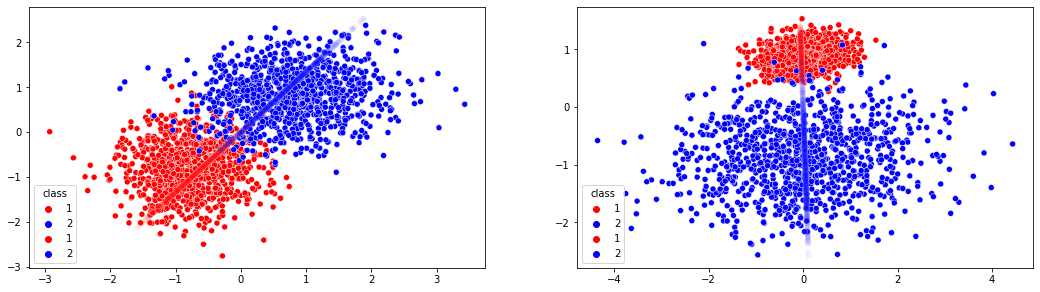

In [ ]:
plt.rcParams["figure.figsize"] =[18, 4.8]
plt.subplot(1, 2, 1)
sns.scatterplot(X1_norm[:,0],X1_norm[:,1],hue=y1,palette=['r','b'])
sns.scatterplot(X1_reduced*v1[0],X1_reduced*v1[1],hue=y1,palette=['r','b'],alpha=0.05)
plt.subplot(1, 2, 2)
sns.scatterplot(X2_norm[:,0],X2_norm[:,1],hue=y2,palette=['r','b'])
sns.scatterplot(X2_reduced*v2[0],X2_reduced*v2[1],hue=y2,palette=['r','b'],alpha=0.05)